1. Request Library

# 크롤링의 원리
- 절차는 빅픽처에서 보면 아래와 같다
1. 정보를 가져올 사이트를 불러온다.
2. 원하는 정보와 해당 정보의 위치를 찾는다.
3. 정보를 가져오게 하는 코드를 작성한다.

## Request - Success

In [1]:
# Request?
# 브라우저 역활을 대신 해준다.

In [2]:
import requests as req

In [3]:
# https 프로토콜 포함해서 주소값을 입력해야됨
res_google = req.get('https://www.google.com')

In [4]:
# Response [200] : 통신성공
# Response [400] : 클라이언트 요청의 문제
# Response [500] : 서버의 문제
res_google

<Response [200]>

In [5]:
# html 문서 형식이 아닌 파이썬 형식의 텍스트 데이터
res_google.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="L1JO8rpNzxC9VbTjw6zWYg">(function(){window.google={kEI:\'dy9PZNbnKZHh2roPtfiHqAQ\',kEXPI:\'0,1359409,1710,4348,207,2415,2389,2316,383,246,5,1129120,1197770,380721,16114,19397,9287,22430,1362,283,12035,2817,14764,4998,13228,3847,6885,31559,2872,2891,8349,3405,606,60690,15756,3,576,20573,4,1538,2304,42127,13658,21223,5821,2536,4094,7596,1,42154,2,14022,25739,5679,1020,31123,4567,6259,23418,1252,5835,14968,4332,19,4997,2468,445,2,2,1,24626,2006,8155,7381,1401,78,14491,873,19634,6,1922,9779,36154,6305,2007,18192,17618,2518,14,82,2730,17476,8377,8051,10937,551,4824,1506,1524,6111,5040,4665,1804,5209,2553,2710,2884,13738,6003,5780,3048,2130,2365,662,1635,2170,3628,2,2148,814,3657,1438,586,543,3148,5128,358,1105,

## Request - Failed

In [6]:
# 클라이언트 에러
# 404 : 클라이언트가 요청한 리소스를 서버에서 찾을수 없을때
# 406 : 요청한 리소스를 서버에서 제공할 수 없는 형식으로 요청한 경우
res_melon = req.get('https://www.melon.com')
res_melon

<Response [406]>

In [7]:
# User-agent
# Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36
# 페이지가 응답할 수 있는 형식으로 요청해야됨.
head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}

In [8]:
# 응답하는 페이지에서 원하는 형태의 요청을 해야지 페이지와 연결할 수 있음
res_melon = req.get('https://www.melon.com', headers = head)
res_melon

<Response [200]>

In [9]:
res_melon.text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>Melon::음악이 필요한 순간, 멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" />\r\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" />\r\n\t<meta property="fb:app_id" content="357952407588971"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png"/>\r\n\t<meta property="og:description" content="음악이 필요한 순간, 

2. Beautifulsoup Library
- HTML 문서 내 데이터 접근할 수 있게 변환을 주는 Library

In [10]:
!pip install bs4

In [11]:
from bs4 import BeautifulSoup as bs

### 파싱?
- 웹 페이지에서 원하는 데이터를 추출, 가공하기 쉬운 상태로 변환하는 것

In [12]:
# beatifulsoup 함수를 통해 객체화
bs_google = bs(res_google.text,'lxml')
bs_google

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Google</title><script nonce="L1JO8rpNzxC9VbTjw6zWYg">(function(){window.google={kEI:'dy9PZNbnKZHh2roPtfiHqAQ',kEXPI:'0,1359409,1710,4348,207,2415,2389,2316,383,246,5,1129120,1197770,380721,16114,19397,9287,22430,1362,283,12035,2817,14764,4998,13228,3847,6885,31559,2872,2891,8349,3405,606,60690,15756,3,576,20573,4,1538,2304,42127,13658,21223,5821,2536,4094,7596,1,42154,2,14022,25739,5679,1020,31123,4567,6259,23418,1252,5835,14968,4332,19,4997,2468,445,2,2,1,24626,2006,8155,7381,1401,78,14491,873,19634,6,1922,9779,36154,6305,2007,18192,17618,2518,14,82,2730,17476,8377,8051,10937,551,4824,1506,1524,6111,5040,4665,1804,5209,2553,2710,2884,13738,6003,5780,3048,2130,2365,662,1635,2170,3628,2,2148,814,3657,1438,586,543,3148,5128,358,1105,7

In [13]:
print(type(res_google))
print(type(bs_google))

<class 'requests.models.Response'>
<class 'bs4.BeautifulSoup'>


## Practice 1
- google tab에서 'Google' text 데이터를 가져오자

In [14]:
soup = bs_google.select_one('title')
soup

<title>Google</title>

In [15]:
soup.text

'Google'

### 실습
1. youtube에 접속
2. youtube의 title을 테스트 형식으로 가져오기

In [16]:
res_youtube = req.get('https://www.youtube.com')
res_youtube

<Response [200]>

In [17]:
bs_youtube = bs(res_youtube.text , 'lxml')

In [18]:
bs_youtube

<!DOCTYPE html>
<html darker-dark-theme="" darker-dark-theme-deprecate="" lang="ko-KR" style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" system-icons="" typography="" typography-spacing=""><head><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="Ash03CRZ76itNFXlh04s/Kx5TBY+uSojTNLnxUHnV26xBFl3D+0epAJQ98cRF8WLbalbrCwfmJ4GSLOYXit09g0AAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2ODgwODMxOTksImlzU3ViZG9tYWluIjp0cnVlfQ==" http-equiv="origin-trial"/><script nonce="xdGJGEC7JROtJEMwZeWucA">var ytcfg={d:function(){return window.yt&&yt.config_||ytcfg.data_||(ytcfg.data_={})},get:function(k,o){return k in ytcfg.d()?ytcfg.d()[k]:o},set:function(){var a=arguments;if(a.length>1)ytcfg.d()[a[0]]=a[1];else for(var k in a[0])ytcfg.d()[k]=a[0][k]}};
window.ytcfg.set('EMERGENCY_BASE_URL', '\/error_204?t\x3djserror\x26level\x3dERROR\x26client.name\x3d1\x26client.version\x3d2.20230427.04.00');</script><script 

In [19]:
soup = bs_youtube.select_one('title')
soup.text

'YouTube'

# Beautifulsoup practice1. naver
- naver menu에서 메일 텍스트 추출

In [20]:
res = req.get('https://www.naver.com')
res

<Response [200]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
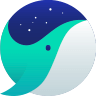
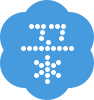

In [21]:
res.text

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
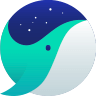
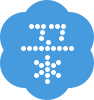

In [22]:
soup = bs(res.text, 'lxml')
soup

In [23]:
# css selector는 어떤 것이 있을까?
# 1. tag selector('태그 이름')
# 2. id selector(#)
# 3. class selector(.)
# 4. child selector(>)
# 5. parent selector(&)
# 6. adjacent selector(+)
# 7. general sibling (일반형제) selector(~)

In [24]:
menus = soup.select('a.nav')
menus

[<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>,
 <a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a>,
 <a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a>,
 <a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a>,
 <a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a>,
 <a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a>,
 <a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a>,
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>,
 <a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a>,
 <a class="nav" data-clk="svc.news" href="https://news.naver.com/">뉴스</a>,
 <a class="nav" data-clk="svc.stock" href="https://finance.naver.com/">증권</a>,


In [25]:
mail = soup.select('a.nav')[0].text
mail

'메일'

In [26]:
for i in range(len(menus)):
    print(menus[i].text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


# naver에서 날씨 데이터 가져오기

In [27]:
res_weather= req.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%98%A4%EB%8A%98%EC%9D%98+%EB%82%A0%EC%94%A8')
res_weather

<Response [200]>

In [28]:
soup = bs(res_weather.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="오늘의 날씨 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'오늘의 날씨'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'오늘의 날씨'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>오늘의 날씨 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230427.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic

In [29]:
temp = soup.select('div.temperature_text > strong')
temp

[<strong><span class="blind">현재 온도</span>18.2<span class="celsius">°</span></strong>,
 <strong><span class="blind">예측 온도</span>10<span class="celsius">°</span></strong>,
 <strong><span class="blind">예측 온도</span>25<span class="celsius">°</span></strong>,
 <strong><span class="blind">예측 온도</span>14<span class="celsius">°</span></strong>,
 <strong><span class="blind">예측 온도</span>24<span class="celsius">°</span></strong>]

In [30]:
temp[0].text

'현재 온도18.2°'

# Naver news 기사 제목 가져오기

In [31]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%9F%AC%EC%8B%9C%EC%95%84+%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98+%EC%A0%84%EC%9F%81'
news = req.get(url)
news

<Response [200]>

In [32]:
soup = bs(news.text,'lxml')
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="러시아 우크라이나 전쟁 : 네이버 뉴스검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'러시아 우크라이나 전쟁'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'러시아 우크라이나 전쟁'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>러시아 우크라이나 전쟁 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230427.css" rel="stylesheet" type="text/css"/> <link h

In [33]:
article = soup.select_one('a.news_tit')
article.text

'KT, 러시아 IDC 법인 1년만에 철수… 우크라이나 전쟁 여파'

# 기사들을 뽑아오기

In [34]:
articles = soup.select('a.news_tit')
len(articles)

10

In [35]:
for i in range(len(articles)):
    print(articles[i].text)

KT, 러시아 IDC 법인 1년만에 철수… 우크라이나 전쟁 여파
교황 “우크라 전쟁 종식 위한 비밀 임무 수행 중”
우크라전 장기화에… 2023년 1분기 러시아인 난민 신청 건수 1위
유엔식량농업기구 "러-우 전쟁, 세계 식량안보에 파괴적인 영향"
“북한, 러시아 용병 회사에 포탄 1만발 제공 예정”
우크라 대반격 임박...러시아 대규모 방어망 구축
KT, 러시아 IDC법인 철수…"우크라이나 전쟁 탓"
시진핑은 왜 우크라이나 젤렌스키와 통화했을까
러시아, 유류시설 공격 인정…"봄철 대반격의 서막"
[단독] 현대차, '脫 러시아' 계획 수립…현대모비스·위아는 '부품 공급' 유지...


In [36]:
articles[3].text

'유엔식량농업기구 "러-우 전쟁, 세계 식량안보에 파괴적인 영향"'

### 개인실습 
1. 네이버 창 -> 원하는 키워드 검색
2. 뉴스 탭으로 이동
3. bs으로 요소들을 뽑아보고
4. 그 중 마음에 드는 기사 하나를 추출

In [44]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98'
res = req.get(url)
res

<Response [200]>

In [45]:
soup = bs(res.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="우크라이나 : 네이버 뉴스검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'우크라이나'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'우크라이나'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>우크라이나 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230427.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net

In [46]:
articles = soup.select('.news_tit')
for i in range(len(articles)):
    print(articles[i].text)

교황 "우크라이나 전쟁 종식 위한 '비밀' 임무 수행 중"
크림반도 저유소에서 대형화재…“우크라이나 드론 공격”
시진핑은 왜 우크라이나 젤렌스키와 통화했을까
KT, 러시아 IDC 법인 1년만에 철수… 우크라이나 전쟁 여파
우크라이나, 크름반도 유류탱크 파괴 …'봄 대공세' 신호탄
도네츠크 상공 비행하는 우크라이나 군 헬기
“우크라이나 드론 공격”…대반격 시작되나
FAO, 우크라이나 곡물 수출 안전보장 러시아에 촉구
우크라이나 대사 "이것이 바로 대규모 공습" 尹 언급 왜?
RPG 발사하는 우크라이나 군인


## Melon Chart Top 100 수집 : [타이틀|아티스트]
- 타이틀과 아티스트 명을 bs 사용해서 수집
- pandas 의 df에 집어넣기
- 데이터 저장 파일을 내보내기

In [47]:
import pandas as pd

In [52]:
head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36 Edg/112.0.1722.58'}
url = 'https://www.melon.com/chart/'

melon = req.get(url,headers=head)
melon

<Response [200]>

In [54]:
soup = bs(melon.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" property="og:sit

In [127]:
# 노래 : ellipsis rank01
song = soup.select('div.ellipsis.rank01 > span > a')
song

[<a href="javascript:melon.play.playSong('1000002721',36356993);" title="I AM 재생">I AM</a>,
 <a href="javascript:melon.play.playSong('1000002721',36318125);" title="Kitsch 재생">Kitsch</a>,
 <a href="javascript:melon.play.playSong('1000002721',36331121);" title="꽃 재생">꽃</a>,
 <a href="javascript:melon.play.playSong('1000002721',36391236);" title="손오공 재생">손오공</a>,
 <a href="javascript:melon.play.playSong('1000002721',36110996);" title="파이팅 해야지 (Feat. 이영지) 재생">파이팅 해야지 (Feat. 이영지)</a>,
 <a href="javascript:melon.play.playSong('1000002721',35945927);" title="Ditto 재생">Ditto</a>,
 <a href="javascript:melon.play.playSong('1000002721',35454426);" title="Hype boy 재생">Hype boy</a>,
 <a href="javascript:melon.play.playSong('1000002721',36351997);" title="사람 Pt.2 (feat. 아이유) 재생">사람 Pt.2 (feat. 아이유)</a>,
 <a href="javascript:melon.play.playSong('1000002721',35985167);" title="OMG 재생">OMG</a>,
 <a href="javascript:melon.play.playSong('1000002721',34061322);" title="사랑은 늘 도망가 재생">사랑은 늘 도망가</a>,
 <a hr

In [140]:
# 가수 : ellipsis rank02
singer = soup.select('div.ellipsis.rank02 > span')
singer

[<span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('995174');" title="지수 (JISOO) - 페이지 이동">지수 (JISOO)</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('861436');" title="세븐틴 (SEVENTEEN) - 페이지 이동">세븐틴 (SEVENTEEN)</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('2112233');" title="부석순 (SEVENTEEN) - 페이지 이동">부석순 (SEVENTEEN)</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a></span>,
 <span class="checkEllipsis" s

In [132]:
len(song)

100

In [141]:
len(singer)

100

In [142]:
for i in range(len(song)):
    print(song[i].text)

I AM
Kitsch
꽃
손오공
파이팅 해야지 (Feat. 이영지)
Ditto
Hype boy
사람 Pt.2 (feat. 아이유)
OMG
사랑은 늘 도망가
F*ck My Life
Teddy Bear
FRIEND THE END
사건의 지평선
우리들의 블루스
I Don't Think That I Like Her
CHRISTIAN
다시 만날 수 있을까
London Boy
After LIKE
Polaroid
심(心)
이제 나만 믿어요
Like Crazy
먼지
무지개
빛이 나는 너에게
아버지
물론
Love Me Like This
Attention
ANTIFRAGILE
A bientot
LOVE DIVE
April shower
인생찬가
헤어지자 말해요
Cupid
사랑하지 않아서 그랬어
손이 참 곱던 그대
Fire
사랑해 진짜
I Don't Understand But I Luv U
NIGHT DANCER
연애편지
Dangerously
보금자리
사랑인가 봐
Dynamite
Heaven(2023)
사랑하기 싫어
Zero
밤이 무서워요 (Lonely Night)
Nostalgia
봄날
HOT
너의 모든 순간
Perfume
Candy
가질 수 없는 너
건물 사이에 피어난 장미 (Rose Blossom)
Butter
on the street (with J. Cole)
발걸음
Nxde
VIBE (feat. Jimin of BTS)
해요 (2022)
해금
That's Hilarious
너를 보는게 지친 하루에
Say I Love You
Monologue
Permission to Dance
STAY
Set Me Free Pt.2
Shut Down
새삥 (Prod. ZICO) (Feat. 호미들)
ELEVEN
나비무덤
KNOCK
취중고백
다시 사랑한다면
Pink Venom
그라데이션
TOMBOY
내가 아니라도
안녕이라고 말하지마
Cookie
FEARLESS
정이라고 하자 (Feat. 10CM)
그중에 그대를 만나
나의 마음에 (Seed)
Say My Name
다정히 내 이름을 부르면
그때

In [143]:
for i in range(len(singer)):
    print(singer[i].text)

IVE (아이브)
IVE (아이브)
지수 (JISOO)
세븐틴 (SEVENTEEN)
부석순 (SEVENTEEN)
NewJeans
NewJeans
Agust D
NewJeans
임영웅
세븐틴 (SEVENTEEN)
STAYC(스테이씨)
볼빨간사춘기
윤하 (YOUNHA)
임영웅
Charlie Puth
Zior Park
임영웅
임영웅
IVE (아이브)
임영웅
DK(디셈버)
임영웅
지민
세븐틴 (SEVENTEEN)
임영웅
던 (DAWN)
임영웅
허각
NMIXX
NewJeans
LE SSERAFIM (르세라핌)
임영웅
IVE (아이브)
세븐틴 (SEVENTEEN)
임영웅
박재정
FIFTY FIFTY
임한별
임영웅
세븐틴 (SEVENTEEN)
임영웅
세븐틴 (SEVENTEEN)
imase
임영웅
Charlie Puth
임영웅
멜로망스
방탄소년단
임재현
지아
NewJeans
주주 시크릿
우디 (Woody)
방탄소년단
세븐틴 (SEVENTEEN)
성시경
NCT 도재정
NCT DREAM
#안녕
H1-KEY (하이키)
방탄소년단
j-hope, J. Cole
DK(디셈버)
(여자)아이들
태양
#안녕
Agust D
Charlie Puth
송하예
우디 (Woody)
테이
방탄소년단
The Kid LAROI, Justin Bieber
지민
BLACKPINK
지코 (ZICO)
IVE (아이브)
포맨 (4MEN)
이채연
김민석 (멜로망스)
한동근
BLACKPINK
10CM
(여자)아이들
주호
V.O.S
NewJeans
LE SSERAFIM (르세라핌)
BIG Naughty (서동현)
김호중
태양
Say Yes!
경서예지, 전건호
WSG워너비 (가야G)
윤하 (YOUNHA)
헤이즈 (Heize)
폴킴
Charlie Puth
WSG워너비 (가야G)


In [172]:
title = []
artist = []

for i in range(len(song)):
    title.append(song[i].text)
    artist.append(singer[i].text)
    print(title[i],"/",artist[i])

I AM / IVE (아이브)
Kitsch / IVE (아이브)
꽃 / 지수 (JISOO)
손오공 / 세븐틴 (SEVENTEEN)
파이팅 해야지 (Feat. 이영지) / 부석순 (SEVENTEEN)
Ditto / NewJeans
Hype boy / NewJeans
사람 Pt.2 (feat. 아이유) / Agust D
OMG / NewJeans
사랑은 늘 도망가 / 임영웅
F*ck My Life / 세븐틴 (SEVENTEEN)
Teddy Bear / STAYC(스테이씨)
FRIEND THE END / 볼빨간사춘기
사건의 지평선 / 윤하 (YOUNHA)
우리들의 블루스 / 임영웅
I Don't Think That I Like Her / Charlie Puth
CHRISTIAN / Zior Park
다시 만날 수 있을까 / 임영웅
London Boy / 임영웅
After LIKE / IVE (아이브)
Polaroid / 임영웅
심(心) / DK(디셈버)
이제 나만 믿어요 / 임영웅
Like Crazy / 지민
먼지 / 세븐틴 (SEVENTEEN)
무지개 / 임영웅
빛이 나는 너에게 / 던 (DAWN)
아버지 / 임영웅
물론 / 허각
Love Me Like This / NMIXX
Attention / NewJeans
ANTIFRAGILE / LE SSERAFIM (르세라핌)
A bientot / 임영웅
LOVE DIVE / IVE (아이브)
April shower / 세븐틴 (SEVENTEEN)
인생찬가 / 임영웅
헤어지자 말해요 / 박재정
Cupid / FIFTY FIFTY
사랑하지 않아서 그랬어 / 임한별
손이 참 곱던 그대 / 임영웅
Fire / 세븐틴 (SEVENTEEN)
사랑해 진짜 / 임영웅
I Don't Understand But I Luv U / 세븐틴 (SEVENTEEN)
NIGHT DANCER / imase
연애편지 / 임영웅
Dangerously / Charlie Puth
보금자리 / 임영웅
사랑인가 봐 / 멜로망스
Dynamite / 방탄소년단


In [171]:
melon_dic = {'타이틀':title,'아티스트':artist}
melon_dic

{'타이틀': ['I AM',
  'Kitsch',
  '꽃',
  '손오공',
  '파이팅 해야지 (Feat. 이영지)',
  'Ditto',
  'Hype boy',
  '사람 Pt.2 (feat. 아이유)',
  'OMG',
  '사랑은 늘 도망가',
  'F*ck My Life',
  'Teddy Bear',
  'FRIEND THE END',
  '사건의 지평선',
  '우리들의 블루스',
  "I Don't Think That I Like Her",
  'CHRISTIAN',
  '다시 만날 수 있을까',
  'London Boy',
  'After LIKE',
  'Polaroid',
  '심(心)',
  '이제 나만 믿어요',
  'Like Crazy',
  '먼지',
  '무지개',
  '빛이 나는 너에게',
  '아버지',
  '물론',
  'Love Me Like This',
  'Attention',
  'ANTIFRAGILE',
  'A bientot',
  'LOVE DIVE',
  'April shower',
  '인생찬가',
  '헤어지자 말해요',
  'Cupid',
  '사랑하지 않아서 그랬어',
  '손이 참 곱던 그대',
  'Fire',
  '사랑해 진짜',
  "I Don't Understand But I Luv U",
  'NIGHT DANCER',
  '연애편지',
  'Dangerously',
  '보금자리',
  '사랑인가 봐',
  'Dynamite',
  'Heaven(2023)',
  '사랑하기 싫어',
  'Zero',
  '밤이 무서워요 (Lonely Night)',
  'Nostalgia',
  '봄날',
  'HOT',
  '너의 모든 순간',
  'Perfume',
  'Candy',
  '가질 수 없는 너',
  '건물 사이에 피어난 장미 (Rose Blossom)',
  'Butter',
  'on the street (with J. Cole)',
  '발걸음',
  'Nxde',
  'VIBE 

In [173]:
melon_df = pd.DataFrame(melon_dic)
melon_df

,타이틀,아티스트
0,I AM,IVE (아이브)
1,Kitsch,IVE (아이브)
2,꽃,지수 (JISOO)
3,손오공,세븐틴 (SEVENTEEN)
4,파이팅 해야지 (Feat. 이영지),부석순 (SEVENTEEN)
...,...,...
95,오르트구름,윤하 (YOUNHA)
96,빙글빙글 (Prod. R.Tee),헤이즈 (Heize)
97,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴
98,That’s Not How This Works (feat. Dan + Shay),Charlie Puth


In [174]:
# csv 파일로 내보내기
melon_df.to_csv('C:/Users/user06/WebClawling/melon_char.csv', encoding='euc-kr')